In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [19]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data1 = pd.DataFrame(data[['Attrition','PerformanceRating','MonthlyIncome','StockOptionLevel','WorkLifeBalance','BusinessTravel','Department','JobRole','OverTime','RelationshipSatisfaction','TrainingTimesLastYear']])
data1.head()

,Attrition,PerformanceRating,MonthlyIncome,StockOptionLevel,WorkLifeBalance,BusinessTravel,Department,JobRole,OverTime,RelationshipSatisfaction,TrainingTimesLastYear
0,Yes,3,5993,0,1,Travel_Rarely,Sales,Sales Executive,Yes,1,0
1,No,4,5130,1,3,Travel_Frequently,Research & Development,Research Scientist,No,4,3
2,Yes,3,2090,0,3,Travel_Rarely,Research & Development,Laboratory Technician,Yes,2,3
3,No,3,2909,0,3,Travel_Frequently,Research & Development,Research Scientist,Yes,3,3
4,No,3,3468,1,3,Travel_Rarely,Research & Development,Laboratory Technician,No,4,3


In [20]:
data1_numeric=data1[['PerformanceRating','MonthlyIncome', "StockOptionLevel","WorkLifeBalance","RelationshipSatisfaction","TrainingTimesLastYear"]]
data1_category=data1[["Attrition","BusinessTravel","Department","JobRole","OverTime"]]
data1_category=data1_category.apply(lambda x : pd.factorize(x)[0])
data2=pd.concat([data1_category, data1_numeric], axis=1, join='inner')
print("data dimension:", data2.shape)
data2.head()

data dimension: (1470, 11)


,Attrition,BusinessTravel,Department,JobRole,OverTime,PerformanceRating,MonthlyIncome,StockOptionLevel,WorkLifeBalance,RelationshipSatisfaction,TrainingTimesLastYear
0,0,0,0,0,0,3,5993,0,1,1,0
1,1,1,1,1,1,4,5130,1,3,4,3
2,0,0,1,2,0,3,2090,0,3,2,3
3,1,1,1,1,0,3,2909,0,3,3,3
4,1,0,1,2,1,3,3468,1,3,4,3


In [21]:
# Summary Statistics for all Variables
data2.describe().round(2)

,Attrition,BusinessTravel,Department,JobRole,OverTime,PerformanceRating,MonthlyIncome,StockOptionLevel,WorkLifeBalance,RelationshipSatisfaction,TrainingTimesLastYear
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,0.84,0.39,0.74,2.55,0.72,3.15,6502.93,0.79,2.76,2.71,2.80
std,0.37,0.67,0.53,2.32,0.45,0.36,4707.96,0.85,0.71,1.08,1.29
min,0.00,0.00,0.00,0.00,0.00,3.00,1009.00,0.00,1.00,1.00,0.00
25%,1.00,0.00,0.00,1.00,0.00,3.00,2911.00,0.00,2.00,2.00,2.00
50%,1.00,0.00,1.00,2.00,1.00,3.00,4919.00,1.00,3.00,3.00,3.00
75%,1.00,1.00,1.00,4.00,1.00,3.00,8379.00,1.00,3.00,4.00,3.00
max,1.00,2.00,2.00,8.00,1.00,4.00,19999.00,3.00,4.00,4.00,6.00


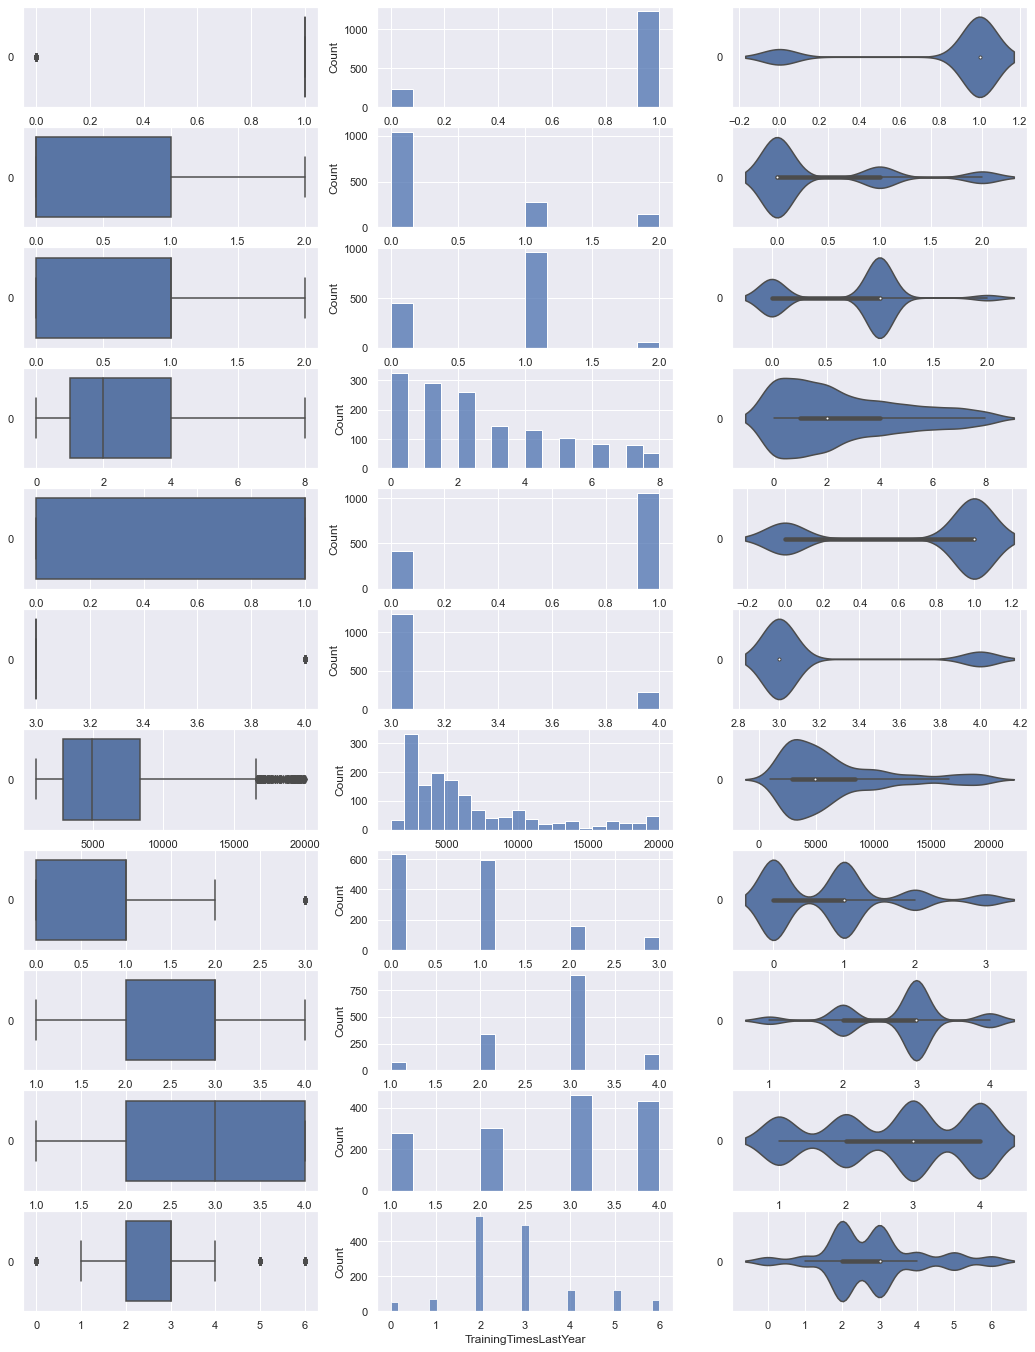

In [22]:
f, axes = plt.subplots(11, 3, figsize=(18, 24))
count = 0
for var in data2:
    sb.boxplot(data = data2[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = data2[var], ax = axes[count,1])
    sb.violinplot(data = data2[var], orient = "h", ax = axes[count,2])
    count += 1

In [27]:
data2.corr(method='pearson', min_periods=1)

,Attrition,BusinessTravel,Department,JobRole,OverTime,PerformanceRating,MonthlyIncome,StockOptionLevel,WorkLifeBalance,RelationshipSatisfaction,TrainingTimesLastYear
Attrition,1.000000,0.000074,0.063991,0.027930,0.246118,-0.002889,0.159840,0.137145,0.063939,0.045872,0.059478
BusinessTravel,0.000074,1.000000,-0.009044,-0.028664,0.016543,0.026341,-0.034319,0.016727,0.011256,0.035986,-0.015240
Department,0.063991,-0.009044,1.000000,0.425036,0.007481,0.024604,-0.053130,0.012193,-0.026383,0.022414,-0.036875
JobRole,0.027930,-0.028664,0.425036,1.000000,0.020850,0.000818,0.382474,-0.020428,0.049807,0.018408,-0.002919
OverTime,0.246118,0.016543,0.007481,0.020850,1.000000,-0.004369,-0.006089,0.000449,0.027092,-0.048493,0.079113
PerformanceRating,-0.002889,0.026341,0.024604,0.000818,-0.004369,1.000000,-0.017120,0.003506,0.002572,-0.031351,-0.015579
MonthlyIncome,0.159840,-0.034319,-0.053130,0.382474,-0.006089,-0.017120,1.000000,0.005408,0.030683,0.025873,-0.021736
StockOptionLevel,0.137145,0.016727,0.012193,-0.020428,0.000449,0.003506,0.005408,1.000000,0.004129,-0.045952,0.011274
WorkLifeBalance,0.063939,0.011256,-0.026383,0.049807,0.027092,0.002572,0.030683,0.004129,1.000000,0.019604,0.028072
RelationshipSatisfaction,0.045872,0.035986,0.022414,0.018408,-0.048493,-0.031351,0.025873,-0.045952,0.019604,1.000000,0.002497


<AxesSubplot:>

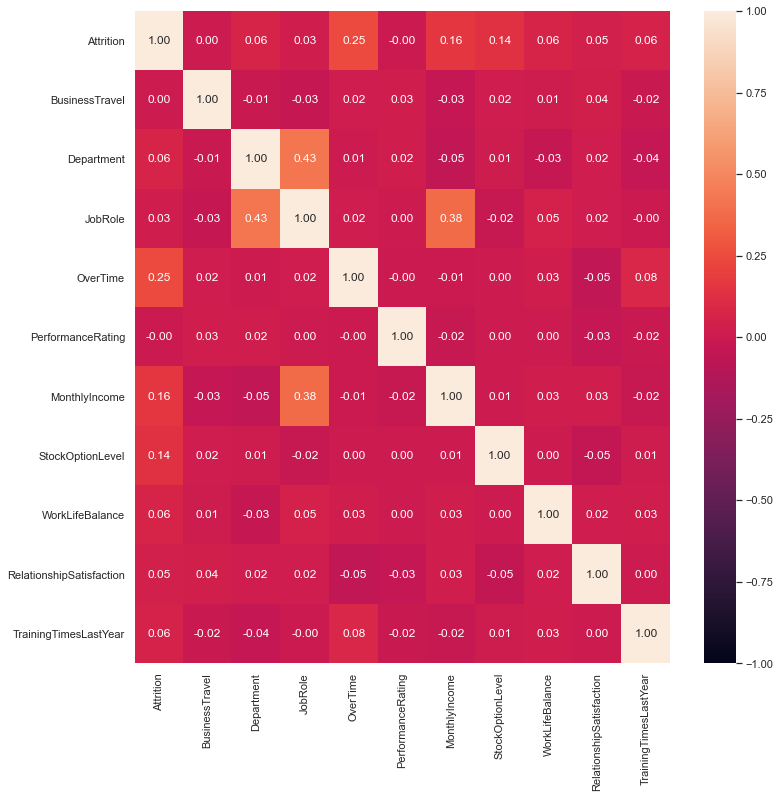

In [24]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(data2.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

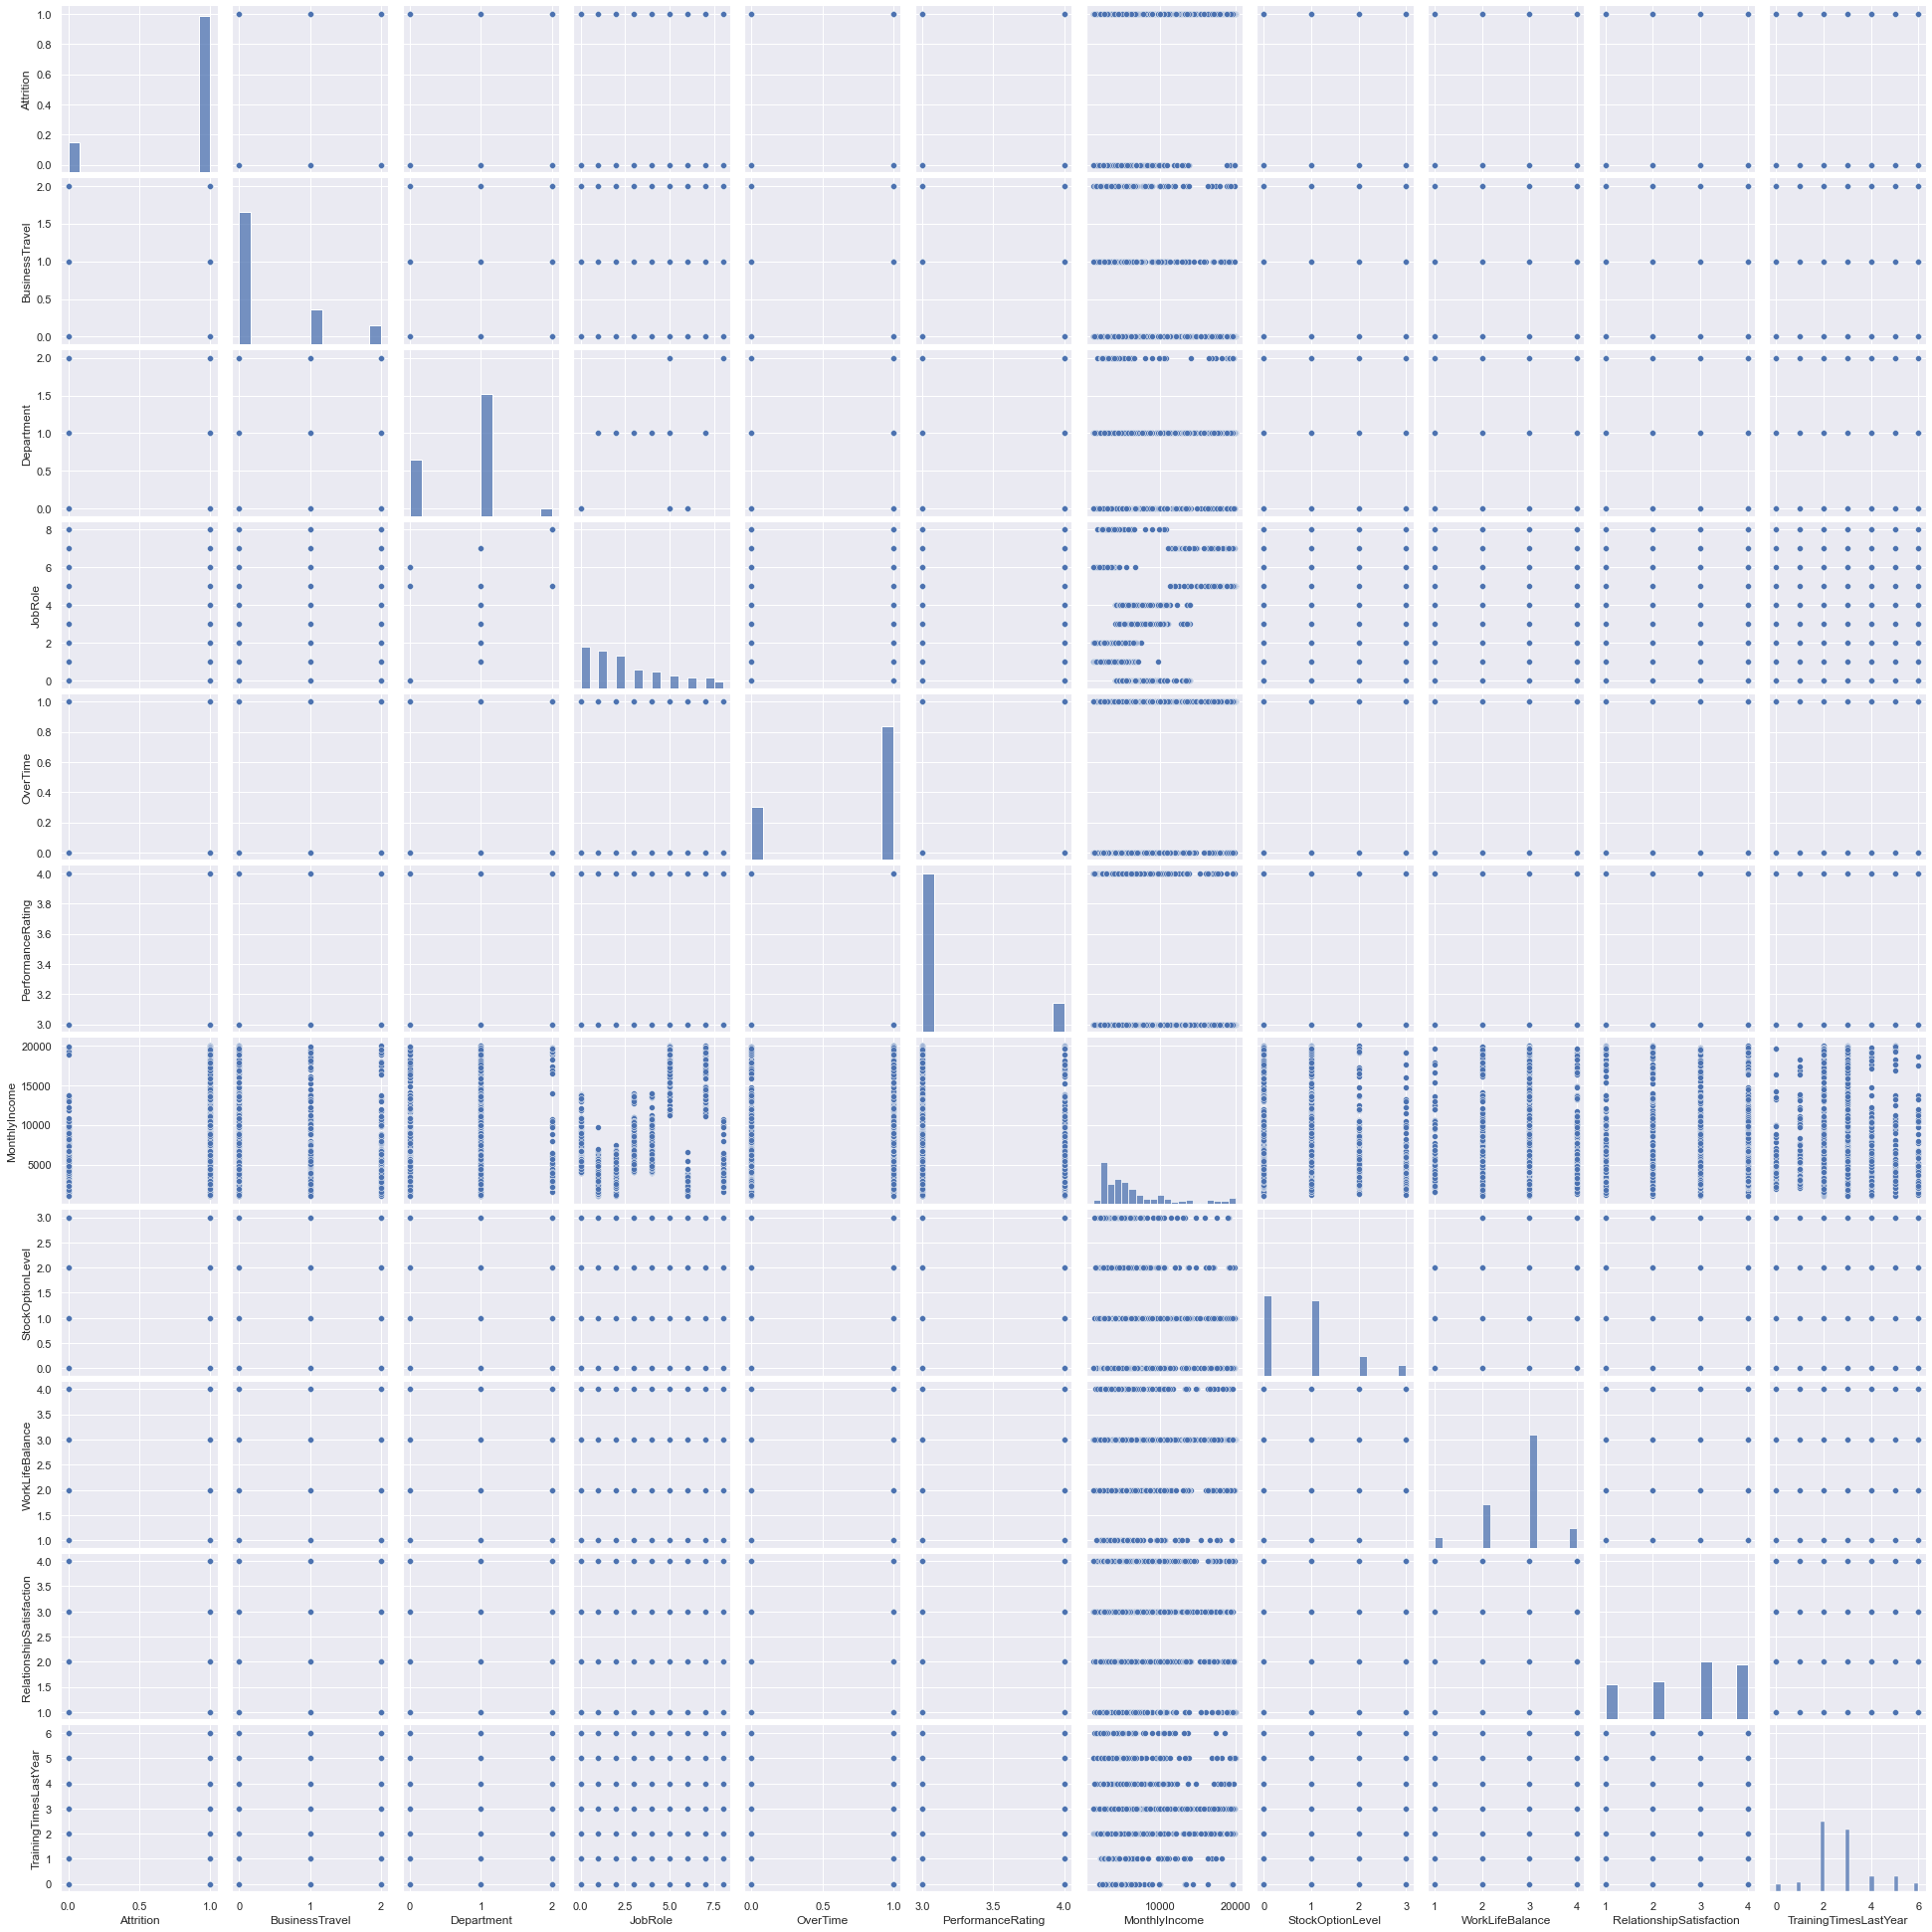

In [25]:
sb.pairplot(data = data2)

<AxesSubplot:xlabel='Attrition'>

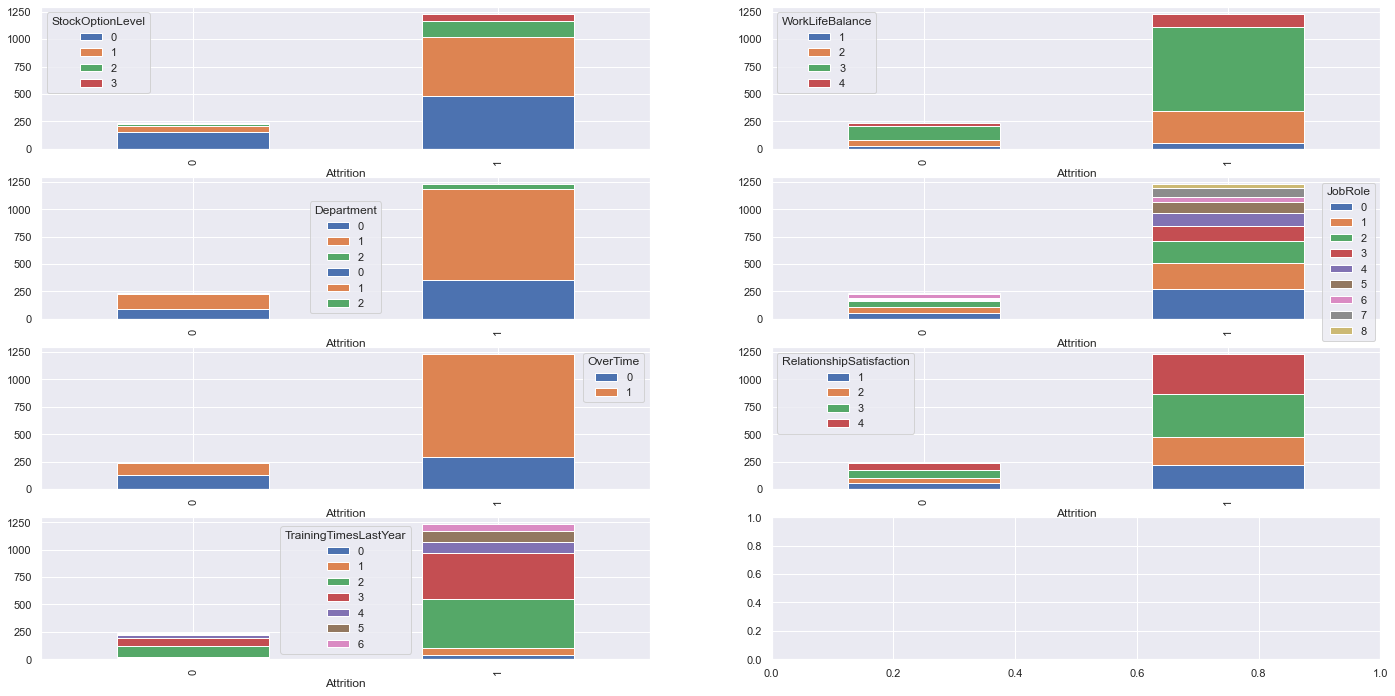

In [16]:
f, axes = plt.subplots(4, 2, figsize=(24, 12))
pd.crosstab(data2['Attrition'], data2['StockOptionLevel']).plot(kind='bar', stacked=True, ax=axes[0,0])
pd.crosstab(data2['Attrition'], data2['WorkLifeBalance']).plot(kind='bar', stacked=True, ax=axes[0,1])
pd.crosstab(data2['Attrition'], data2['BusinessTravel']).plot(kind='bar', stacked=True, ax=axes[1,0])
pd.crosstab(data2['Attrition'], data2['Department']).plot(kind='bar', stacked=True, ax=axes[1,0])
pd.crosstab(data2['Attrition'], data2['JobRole']).plot(kind='bar', stacked=True, ax=axes[1,1])
pd.crosstab(data2['Attrition'], data2['OverTime']).plot(kind='bar', stacked=True, ax=axes[2,0])
pd.crosstab(data2['Attrition'], data2['RelationshipSatisfaction']).plot(kind='bar', stacked=True, ax=axes[2,1])
pd.crosstab(data2['Attrition'], data2['TrainingTimesLastYear']).plot(kind='bar', stacked=True, ax=axes[3,0])

<AxesSubplot:xlabel='PerformanceRating'>

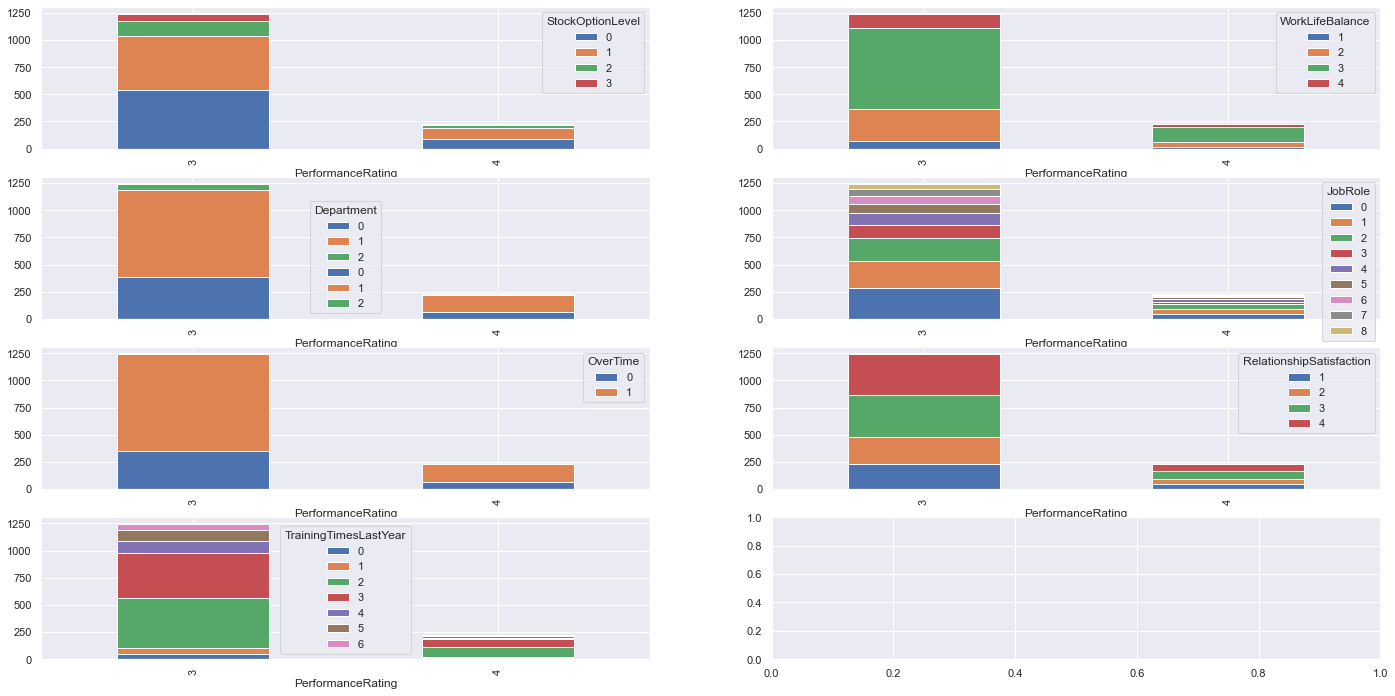

In [26]:
f, axes = plt.subplots(4, 2, figsize=(24, 12))
pd.crosstab(data2['PerformanceRating'], data2['StockOptionLevel']).plot(kind='bar', stacked=True, ax=axes[0,0])
pd.crosstab(data2['PerformanceRating'], data2['WorkLifeBalance']).plot(kind='bar', stacked=True, ax=axes[0,1])
pd.crosstab(data2['PerformanceRating'], data2['BusinessTravel']).plot(kind='bar', stacked=True, ax=axes[1,0])
pd.crosstab(data2['PerformanceRating'], data2['Department']).plot(kind='bar', stacked=True, ax=axes[1,0])
pd.crosstab(data2['PerformanceRating'], data2['JobRole']).plot(kind='bar', stacked=True, ax=axes[1,1])
pd.crosstab(data2['PerformanceRating'], data2['OverTime']).plot(kind='bar', stacked=True, ax=axes[2,0])
pd.crosstab(data2['PerformanceRating'], data2['RelationshipSatisfaction']).plot(kind='bar', stacked=True, ax=axes[2,1])
pd.crosstab(data2['PerformanceRating'], data2['TrainingTimesLastYear']).plot(kind='bar', stacked=True, ax=axes[3,0])

In [8]:
data3 = data2.drop(['BusinessTravel'], axis=1)
data3.head()

,Attrition,Department,JobRole,OverTime,StockOptionLevel,WorkLifeBalance,RelationshipSatisfaction,TrainingTimesLastYear
0,0,0,0,0,0,1,1,0
1,1,1,1,1,1,3,4,3
2,0,1,2,0,0,3,2,3
3,1,1,1,0,0,3,3,3
4,1,1,2,1,1,3,4,3
